In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
temp = pd.read_csv('C:/Users/sansk/Desktop/github/spotify/combined-csv/edited-spotify-data.csv')

In [4]:
temp.head()

,endTime,artist,track,time
0,21/06/2021 17:55,dontaskalex,Heaven,1.631583
1,22/06/2021 07:38,Offset,Ric Flair Drip (with Metro Boomin),0.016383
2,22/06/2021 07:38,DJ Khaled,POPSTAR (feat. Drake),0.010733
3,22/06/2021 07:38,Pop Smoke,Dior,0.047467
4,22/06/2021 07:38,Drake,Chicago Freestyle (feat. Giveon),0.083667


In [5]:
temp['time'] = round(temp['time'], 3)

In [6]:
temp2 = pd.DataFrame(temp.groupby(['track', 'artist']).sum())

In [7]:
temp2.head()

,,time
track,artist,
!!!!!!!,Billie Eilish,0.000
!I'll Be Back!,Rilès,1.966
'Till I Collapse,Eminem,5.951
(Everything I Do) I Do It For You,Bryan Adams,6.743
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,3.714


In [8]:
mergedRes = pd.merge(temp, temp2, on =('track', 'artist'))

In [9]:
mergedRes.head()

,endTime,artist,track,time_x,time_y
0,21/06/2021 17:55,dontaskalex,Heaven,1.632,81.639
1,24/06/2021 07:48,dontaskalex,Heaven,1.662,81.639
2,30/06/2021 18:54,dontaskalex,Heaven,1.920,81.639
3,05/07/2021 18:00,dontaskalex,Heaven,1.920,81.639
4,31/08/2021 12:47,dontaskalex,Heaven,1.920,81.639


In [10]:
final_df = mergedRes.sort_values('time_y', ascending=False)

In [11]:
final_df = final_df.drop_duplicates('track')
final_df = final_df.drop(['time_x'], axis =1)

In [12]:
final_df = final_df.rename(columns = {'time_y':'time'})

In [13]:
final_df.shape

(3562, 4)

In [14]:
final_df.head(20)

,endTime,artist,track,time
28281,21/06/2022 12:57,Neanderthal,White Lies,930.462
8133,02/06/2022 14:37,Metro Boomin,Dreamcatcher (feat. Swae Lee & Travis Scott),689.912
10019,22/05/2022 04:37,Khalid,Better,680.091
14448,07/09/2021 11:37,Lil Tjay,20/20,585.679
3128,17/06/2022 13:08,PARTYNEXTDOOR,Come and See Me (feat. Drake),565.210
10572,25/01/2022 22:48,Lil Tjay,Calling My Phone,540.495
27452,18/10/2021 10:53,Neanderthal,Get Out of My Head,526.758
30377,11/05/2022 11:34,T78,The Antidote,484.690
35920,22/05/2022 04:35,Marc Seguí,Tiroteo - Remix,466.454
11426,13/04/2022 17:57,6LACK,ATL Freestyle,408.107


(50.0, 0.0)

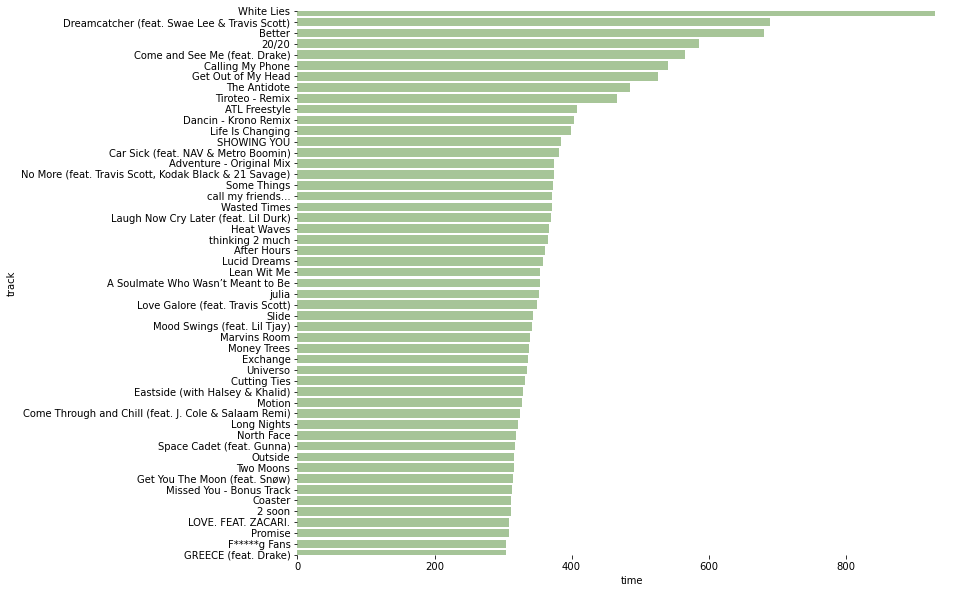

In [27]:
plt.figure(figsize=(12, 10))
sns.barplot(data=final_df, x='time', y='track', palette= 'crest')
sns.despine(left=True, bottom=True)
plt.ylim(50, 0)